### Dropout

Another option for regularization is adding a **dropout** layer. A dropout layer disables some of the neurons (their output becomes 0), while others pass though unchanged. The idea here is to prevent the neural network from becoming too dependent on any neuron, or any neuron becoming relied upon entirely in a specific instance (which can happen when overfitting). The dropout layer also helps with **co-adoption** which happens when neurons becomes dependent on the output of values of other neurons and do not learn the underlying function on their own.

The dropout function works by randomly disabling neurons at a given rate during every forward pass. This forces the network to learn how to make accurate predicitions with only the neurons remaining. We will use a hyper parameter to specify how many neurons to disable randomly.

### Forward pass
We use a bernoulli distribution to determine which neurons to turn off:

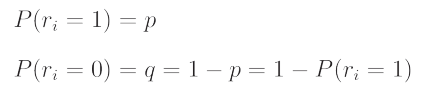

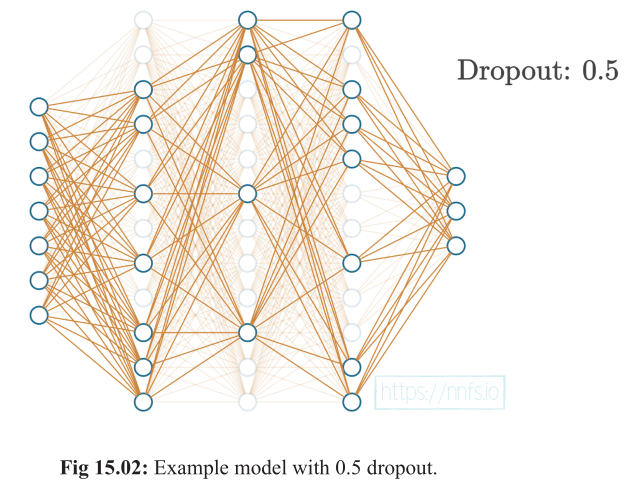

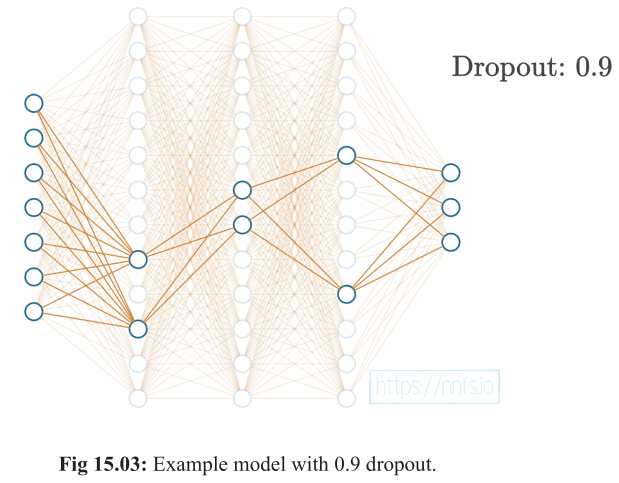

numpy has a `random.binonmial` function that will give us a binomial distribution. Since we are using a dropout rate of  what we want to disable, we want to use a 1-dropout_rate with the binonmial to ensure that the correct amount of neurons remain enabled.

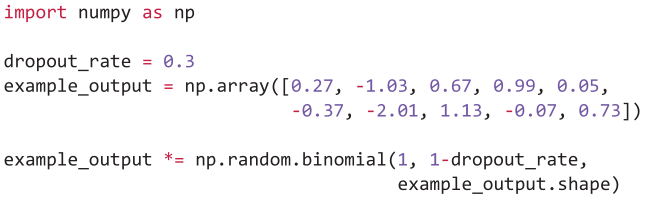

Note that our dropout rate is the ratio of neurons we intend to disable. Some librarys use the ratio of the neurons they intend to keep. Ensure you know which method is being used!

Dropout is helpful for training, but it is not something that is used when predicting. This causes a problem during predicting since the state used for preciting will not match that of training. To fix this, we scale the data back after a dropout during the trainging phase by dividing by 1-dropout. After enough samples the scaling will average itself out.

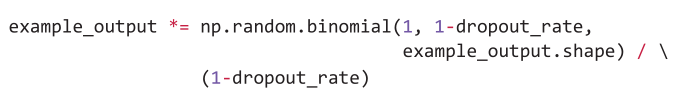

### Backwards pass
The partial derivative of the of the dropout is:

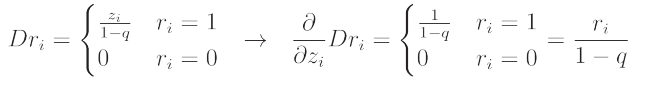

This simplfied to a value from the bernoulli distribution divided by 1-q which is our scaled mask (which we compute in the forward pass; q is the dropout rate)